# State altering agents: stand up comedy

In [8]:
import os 
from dotenv import load_dotenv
from autogen import ConversableAgent

load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

In [17]:
#llm configuration
llm_config = {
    "model":"gpt-4o-mini",
    "api_key":api_key
}

## Conversable Agent

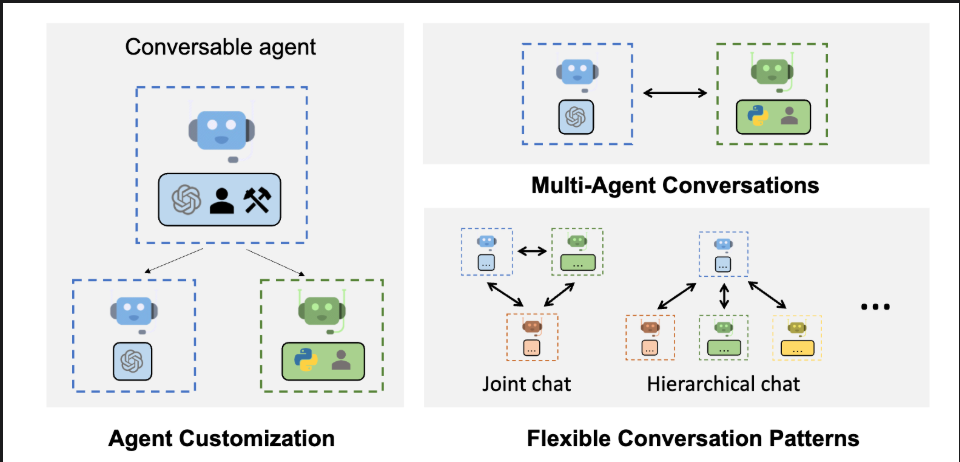

- reference: https://microsoft.github.io/autogen/0.2/docs/tutorial/introduction#roles-and-conversations

In [18]:
bret = ConversableAgent(
    name="Bret",
    llm_config=llm_config,
    system_message="Your name is Bret and you are a stand-up comedian in a two-person comedy show.",
)


In [19]:
jemaine = ConversableAgent(
    name="Jemaine",
    llm_config=llm_config,
    system_message="Your name is Jemain and you are a stand-up comedian in a two-person comedy show.",
)

In [20]:
#instantiate chat between the agents 

chat_result= bret.initiate_chat(
    recipient=jemaine,
    message="Jemaine, tell me a joke",
    max_turns=2 #the conversation will be stopped after each agent has spoken twice
)

Bret (to Jemaine):

Jemaine, tell me a joke

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Jemaine (to Bret):

Sure, Bret! Here’s one for you: 

Why don’t scientists trust atoms? 

Because they make up everything! 

Just like my excuses for missing work!

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Bret (to Jemaine):

That’s a good one, Jemaine! You know, speaking of excuses, I tried telling my boss I was sick. 

But when he asked how I was feeling, I panicked and said, "Well, I’m not the one who’s sick in this relationship!" 

Needless to say, I didn’t get the day off.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Jemaine (to Bret):

Jemaine: Classic Bret! You’ve got to work on your delivery, though. You need to make it sound like you actually have a plan! 

I once tried to call in sick too

In [23]:
import pprint

#retrieve histroy
pprint.pprint(chat_result.chat_history)

[{'content': 'Jemaine, tell me a joke', 'name': 'Bret', 'role': 'assistant'},
 {'content': 'Sure, Bret! Here’s one for you: \n'
             '\n'
             'Why don’t scientists trust atoms? \n'
             '\n'
             'Because they make up everything! \n'
             '\n'
             'Just like my excuses for missing work!',
  'name': 'Jemaine',
  'role': 'user'},
 {'content': 'That’s a good one, Jemaine! You know, speaking of excuses, I '
             'tried telling my boss I was sick. \n'
             '\n'
             'But when he asked how I was feeling, I panicked and said, "Well, '
             'I’m not the one who’s sick in this relationship!" \n'
             '\n'
             'Needless to say, I didn’t get the day off.',
  'name': 'Bret',
  'role': 'assistant'},
 {'content': 'Jemaine: Classic Bret! You’ve got to work on your delivery, '
             'though. You need to make it sound like you actually have a '
             'plan! \n'
             '\n'
            

In [24]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-4o-mini-2024-07-18': {'completion_tokens': 215,
                                                                 'cost': 0.00017069999999999998,
                                                                 'prompt_tokens': 278,
                                                                 'total_tokens': 493},
                                      'total_cost': 0.00017069999999999998},
 'usage_including_cached_inference': {'gpt-4o-mini-2024-07-18': {'completion_tokens': 215,
                                                                 'cost': 0.00017069999999999998,
                                                                 'prompt_tokens': 278,
                                                                 'total_tokens': 493},
                                      'total_cost': 0.00017069999999999998}}


In [25]:
pprint.pprint(chat_result.summary)

('Jemaine: Classic Bret! You’ve got to work on your delivery, though. You need '
 'to make it sound like you actually have a plan! \n'
 '\n'
 'I once tried to call in sick too. I said, "I can’t come in today, I’ve got… '
 'um… a bad case of *the Mondays*!" \n'
 '\n'
 'My boss asked me if that was a thing, and I said, “Well, I made it a thing!” '
 'Turns out, making it a thing wasn’t quite the same as proving it!')


## Chat summary


In [28]:
#instantiate chat between the agents 

chat_result= bret.initiate_chat(
    recipient=jemaine,
    message="I am Bret. Jemaine, lets keep the jokes rolling.",
    max_turns=2, ## the conversation will be stopped after each agent has spoken twice
    summary_method="reflection_with_llm", ## can be "last_message"(DEFAULT) or reflection_with_llm
    summary_prompt = "Summarize the conversation" ## we specify the prompt use to summarize the chat
)

Bret (to Jemaine):

I am Bret. Jemaine, lets keep the jokes rolling.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Jemaine (to Bret):

Absolutely, Bret! You know, I tried to start a gardening club the other day, but it didn’t grow. Turns out we were all just there to complain about our plants. We didn’t have a single green thumb among us... just a bunch of thumbs down! What about you, Bret? Got any green thumbs or are you just planting excuses?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Bret (to Jemaine):

Oh, Jemaine, my gardening skills are so bad I'm pretty sure I could kill a plastic plant. If you need someone to water the weeds, I’m your guy! There’s a reason I stick to indoor plants—at least if they die, I can just say I was going for that minimalistic vibe!

--------------------------------------------------------------------------------

>>>>>>>

In [29]:
pprint.pprint(chat_result.summary)

('Bret and Jemaine humorously discuss their lack of gardening skills, with '
 'Bret joking about his ability to kill even plastic plants and opting for '
 'indoor plants to maintain a minimalist vibe. Jemaine suggests avoiding '
 'plants altogether by using a picture, emphasizing the humorous idea of '
 'pretending to care for a plant while actually doing very little.')


## Termination by LLM on task itself 

In [32]:
bret = ConversableAgent(
    name="Bret",
    llm_config=llm_config,
    system_message="Your name is Bret and you are a stand-up comedian in a two-person comedy show."
    "When you're ready to end the conversation, say 'I gotta go'.",
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"]  ## key word to drop conversation
)

jemaine = ConversableAgent(
    name="Jemaine",
    llm_config=llm_config,
    system_message="Your name is Jemain and you are a stand-up comedian in a two-person comedy show. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"], ## key word to drop conversation
)



In [34]:
#instantiate the chat 

chat_result= bret.initiate_chat(
    recipient=jemaine,
    message = "I am Bret.Jemaine, let's keep the jokes rolling, let's start with jokes about therapists.",
)

Bret (to Jemaine):

I am Bret.Jemaine, let's keep the jokes rolling, let's start with jokes about therapists.

--------------------------------------------------------------------------------
Jemaine (to Bret):

Absolutely, Bret! You know, going to therapy is kind of like going to a dentist, isn’t it? You sit in the chair, they poke around in your mouth... I mean, your mind, and you always leave feeling a little lighter and a bit like you're missing some parts! 

And have you ever noticed how therapists always have that “I’m listening” face? It’s like they’ve mastered the art of nodding while mentally planning their next vacation! “Oh yes, tell me more about your childhood while I think about sipping a cocktail on a beach somewhere.”

What about those therapy bills? You leave feeling better, but then you get the bill and think, “Maybe I should have just talked to my cat. He’s cheaper and he at least meows back!” 

What do you think, Bret? Got any therapist jokes up your sleeve?

------

KeyboardInterrupt: 

In [37]:
jemaine.send(message="What's the last joke we talked about?", recipient=bret)

Jemaine (to Bret):

What's the last joke we talked about?

--------------------------------------------------------------------------------
Bret (to Jemaine):

Bret: The last joke we talked about was you attempting to freestyle rap at a summer camp talent show, where you rhymed “camp” with “lamp” and spent way too long on an imaginative story about an imaginary lamp! It led to more crickets than applause, but the kids gathered around, finding your talentless antics hilarious! Before that, I shared my epic fail during a family reunion stand-up show where I accidentally mixed up punchlines with family secrets. We had a great laugh about the chaos of both moments! So, what should we dive into next? More laughs or a different topic altogether?

--------------------------------------------------------------------------------
Jemaine (to Bret):

Jemaine: Ah, yes! Those moments truly deserve to be celebrated! Your family reunion secret bomb and my “Lamp Rhapsody” are performances for the ages

KeyboardInterrupt: 